In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_learning_curve(model, X, y, X_train=None, X_val=None, y_train=None, y_val=None):

  if X_train is None: 
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=27)
  train_errors, val_errors = [], []
  train_size = np.linspace(10, len(X_train), 10).astype(int)
  for m in train_size:
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)

    train_errors.append(f1_score(y_train[:m], y_train_predict, average='macro'))
    val_errors.append(f1_score(y_val, y_val_predict, average= 'macro'))
  plt.grid()
  plt.plot(train_size, train_errors, 'r', label= 'Training Error')
  plt.plot(train_size, val_errors, 'b', label = 'Validation Error')
  plt.ylabel('F1 Macro Score')
  plt.xlabel('Training Example Size')
  plt.legend(loc='best')

In [3]:
def plot_learning_curve_hyper(df, x_axis_label, y_axis_label, title, ax=None, ylim=None):
  x = []
  for ele in df.params:
    for k, v in ele.items():
      x.append(v)
  if ax is None:
    _, ax = plt.subplots(figsize=(14, 10))

  ax.set_title(title)
  if ylim is not None:
    ax.set_ylim(*ylim)
  ax.set_xlabel(x_axis_label)
  ax.set_ylabel(y_axis_label)
  ax.grid()
  ax.fill_between(
    x,
    (df['mean_train_score'] - df['std_train_score']).values,
    (df['mean_train_score'] + df['std_train_score']).values,
    alpha=0.1,
    color="r",
    )
  ax.fill_between(
    x,
    (df['mean_test_score'] - df['std_test_score']).values,
    (df['mean_test_score'] + df['std_test_score']).values,
    alpha=0.1,
    color="g",
    )
  ax.plot(x, df['mean_train_score'], "x-", color = 'r', label = 'Training Score')
  ax.plot(x, df['mean_test_score'], "x-", color = 'g', label = 'Cross-validation Score')
  ax.legend(loc="best")
  

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd '/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #1/Wine_Classification'

/content/drive/MyDrive/Georgia Tech/Machine Learning-CS7641/Assignments/Assignment #1/Wine_Classification


In [6]:
import pandas as pd

df = pd.read_csv('winequality-white.csv', sep=';')

In [7]:
# Defining X and y
X = df.drop('quality', axis = 1)
y = df['quality']

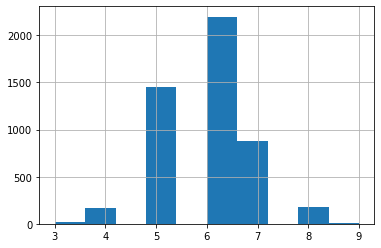

In [43]:
y.hist()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                        random_state=27, test_size = 0.25)

In [9]:
print(y_train.value_counts())
print(y_test.value_counts())

6    1648
5    1093
7     660
8     131
4     122
3      15
9       4
Name: quality, dtype: int64
6    550
5    364
7    220
8     44
4     41
3      5
9      1
Name: quality, dtype: int64


In [10]:
normal_col = ['fixed acidity', 'citric acid', 'total sulfur dioxide', 'pH',
              'alcohol', 'free sulfur dioxide', 'density']
skewd_col = ['volatile acidity', 'residual sugar', 'chlorides', 
            'sulphates']

In [11]:
#Make Copy of X_train and X_test
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

In [12]:
#Make Pipelines for data preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer

normal_pipeline = Pipeline(steps = [('scale', StandardScaler())])
skewd_pipline = Pipeline(steps = [('sk_scale', PowerTransformer())])

full_preprocessor = ColumnTransformer(transformers=[
        ('normal_transform', normal_pipeline, normal_col),
        ('skewd_transform', skewd_pipline, skewd_col)])

X_train_stand = full_preprocessor.fit_transform(X_train_stand)
X_test_stand = full_preprocessor.transform(X_test_stand)

In [13]:
# Try Quick and Dirty KNN Classifier With Unprocessed Data 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score


knn_clf_raw = KNeighborsClassifier()

knn_clf_raw.fit(X_train, y_train)

y_predict_raw = knn_clf_raw.predict(X_test)

print(f'Classification Score with Unproccessed Data on Test Data:\n\n {classification_report(y_predict_raw, y_test, zero_division=1)}')

Classification Score with Unproccessed Data on Test Data:

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.21      0.19        33
           5       0.50      0.46      0.48       400
           6       0.60      0.54      0.57       610
           7       0.31      0.41      0.35       169
           8       0.07      0.25      0.11        12
           9       0.00      1.00      0.00         0

    accuracy                           0.48      1225
   macro avg       0.24      0.41      0.24      1225
weighted avg       0.51      0.48      0.49      1225



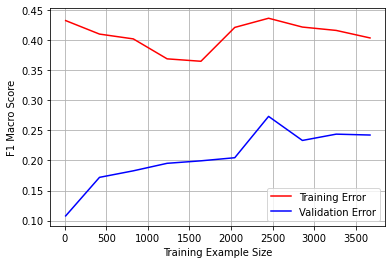

In [14]:
plot_learning_curve(knn_clf_raw, X, y)

In [15]:
# Try Quick and Dirty KNN Classifier With processed Data 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


knn_clf_p = KNeighborsClassifier()

knn_clf_p.fit(X_train_stand, y_train)

y_predict_p = knn_clf_p.predict(X_test_stand)

print(f'Classification Score with proccessed Data on Test Data:\n\n {classification_report(y_predict_p, y_test, zero_division=1)}')

Classification Score with proccessed Data on Test Data:

               precision    recall  f1-score   support

           3       0.20      0.50      0.29         2
           4       0.05      0.10      0.06        21
           5       0.60      0.55      0.57       395
           6       0.65      0.59      0.62       612
           7       0.45      0.54      0.49       180
           8       0.11      0.33      0.17        15
           9       0.00      1.00      0.00         0

    accuracy                           0.56      1225
   macro avg       0.29      0.52      0.31      1225
weighted avg       0.59      0.56      0.57      1225



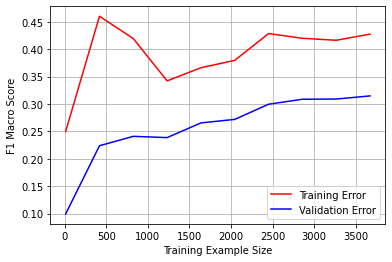

In [16]:
plot_learning_curve(knn_clf_p, X, y, X_train= X_train_stand, X_val=X_test_stand, y_train = y_train, y_val=y_test)

In [17]:
X_train_stand_df = pd.DataFrame(X_train_stand, columns=X_train.columns)
X_test_stand_df = pd.DataFrame(X_test_stand, columns=X_test.columns)

In [ ]:
# Feature Selection using Anova Analysis
from sklearn.feature_selection import SelectKBest, f_classif

selection = SelectKBest(f_classif, k=6)



selection.fit(X_train_stand_df, y_train)

print(f'List of features inputed:\n {selection.feature_names_in_}\n')
print(f'List of features selected:\n {X_train_stand_df.columns[selection.get_support()]}')

X_train_selected = selection.transform(X_train_stand_df)
X_test_selected = selection.transform(X_test_stand_df)

In [19]:
# Try Quick and Dirty KNN Classifier With processed Data and Feature Selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


knn_clf_feature = KNeighborsClassifier()

knn_clf_feature.fit(X_train_selected, y_train)

y_predict_feature = knn_clf_feature.predict(X_test_selected)

print(f'Classification Score with Unproccessed Data on Test Data:\n\n {classification_report(y_predict_feature, y_test, zero_division=1)}')

Classification Score with Unproccessed Data on Test Data:

               precision    recall  f1-score   support

           3       0.20      0.33      0.25         3
           4       0.12      0.25      0.16        20
           5       0.61      0.54      0.58       410
           6       0.59      0.56      0.57       578
           7       0.43      0.47      0.45       201
           8       0.09      0.31      0.14        13
           9       0.00      1.00      0.00         0

    accuracy                           0.53      1225
   macro avg       0.29      0.49      0.31      1225
weighted avg       0.56      0.53      0.54      1225



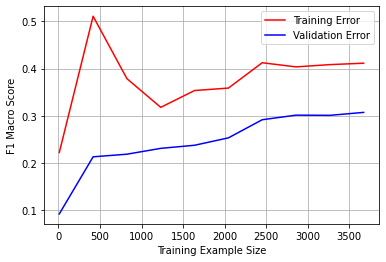

In [20]:
plot_learning_curve(knn_clf_feature, X, y, X_train = X_train_selected, X_val = X_test_selected, y_train = y_train, y_val = y_test)

Feature Selection did not help the model performance. Continue with all parameters involved

In [21]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier()
# Test for best number of neighbors
param_grid = [{'n_neighbors': [i for i in range(3, 20)]}]
grid_search = GridSearchCV(clf, param_grid= param_grid, cv=4, n_jobs=-1,
                           return_train_score=True, scoring='f1_macro')

grid_search.fit(X_train_stand, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14, 15, 16, 17, 18, 19]}],
             return_train_score=True, scoring='f1_macro')

In [22]:
df_neighbor = pd.DataFrame(grid_search.cv_results_)
grid_search.best_params_

{'n_neighbors': 3}

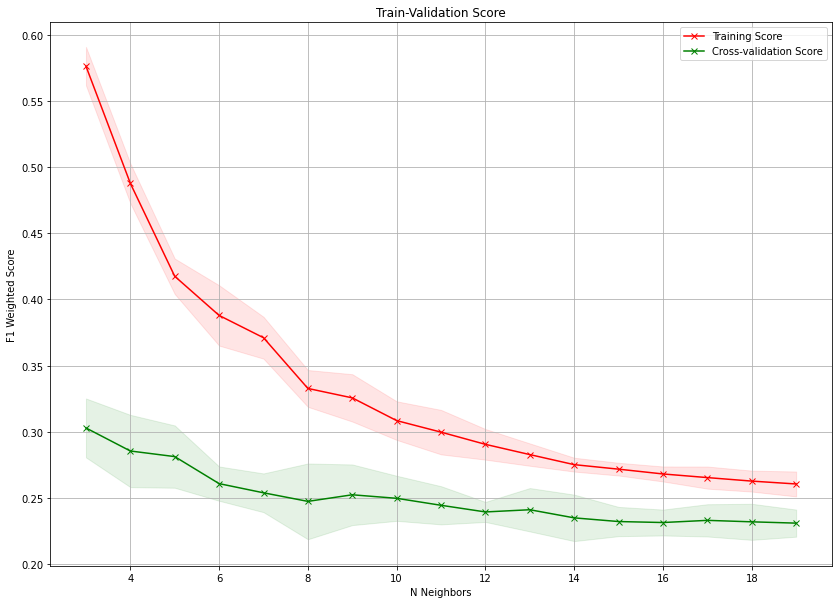

In [23]:
plot_learning_curve_hyper(df_neighbor, 'N Neighbors', 'F1 Weighted Score', 'Train-Validation Score')

In [24]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier()
# Test for best number of neighbors
param_grid = [{'weights': ['uniform', 'distance']}]
grid_search = GridSearchCV(clf, param_grid= param_grid, cv=4, n_jobs=-1,
                           return_train_score=True, scoring='f1_macro')

grid_search.fit(X_train_stand, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='f1_macro')

In [25]:
df_weights = pd.DataFrame(grid_search.cv_results_)
grid_search.best_params_

{'weights': 'distance'}

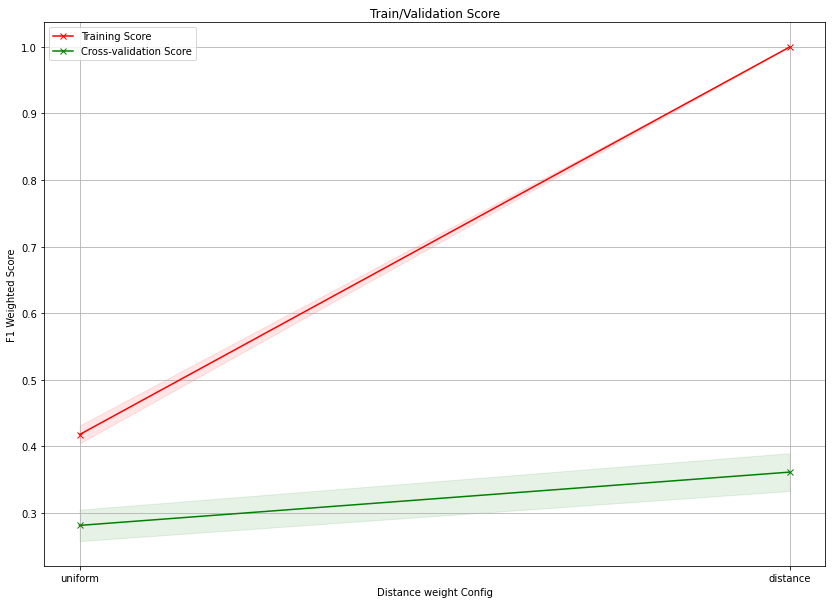

In [26]:
plot_learning_curve_hyper(df_weights, 'Distance weight Config', 'F1 Weighted Score', 'Train/Validation Score')

In [27]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier()
# Test for best algorithm for computing distance btw neighbors
param_grid = [{'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}]
grid_search = GridSearchCV(clf, param_grid= param_grid, cv=4, n_jobs=-1,
                           return_train_score=True, scoring='f1_macro')

grid_search.fit(X_train_stand, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute',
                                        'auto']}],
             return_train_score=True, scoring='f1_macro')

In [28]:
df_algo = pd.DataFrame(grid_search.cv_results_)
grid_search.best_params_

{'algorithm': 'ball_tree'}

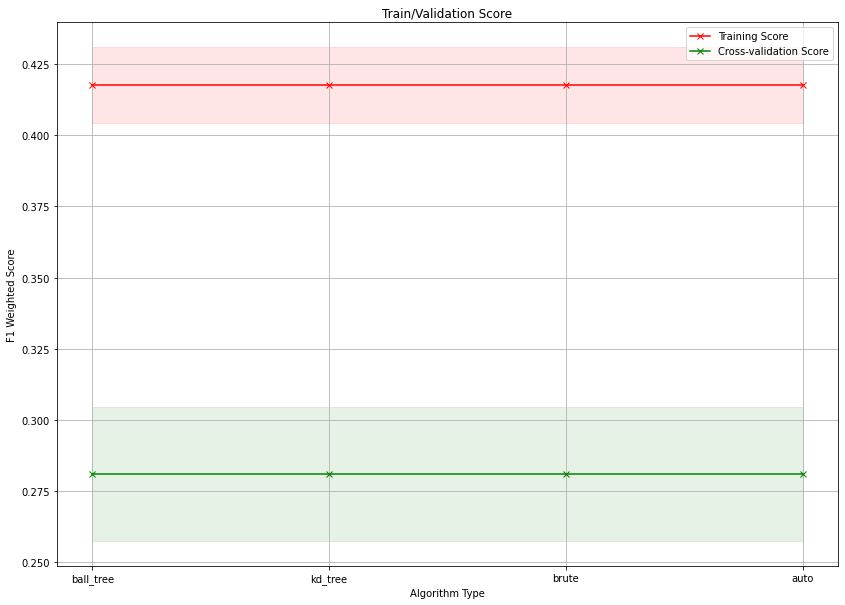

In [29]:
plot_learning_curve_hyper( df_algo, 'Algorithm Type', 'F1 Weighted Score', 'Train/Validation Score')

In [30]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier()
# Test for best value for p (Minkowski Metric)
param_grid = [{'p': [i for i in range(1,5)]}]
grid_search = GridSearchCV(clf, param_grid= param_grid, cv=4, n_jobs=-1,
                           return_train_score=True, scoring='f1_macro')

grid_search.fit(X_train_stand, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'p': [1, 2, 3, 4]}], return_train_score=True,
             scoring='f1_macro')

In [31]:
df_p = pd.DataFrame(grid_search.cv_results_)
grid_search.best_params_

{'p': 1}

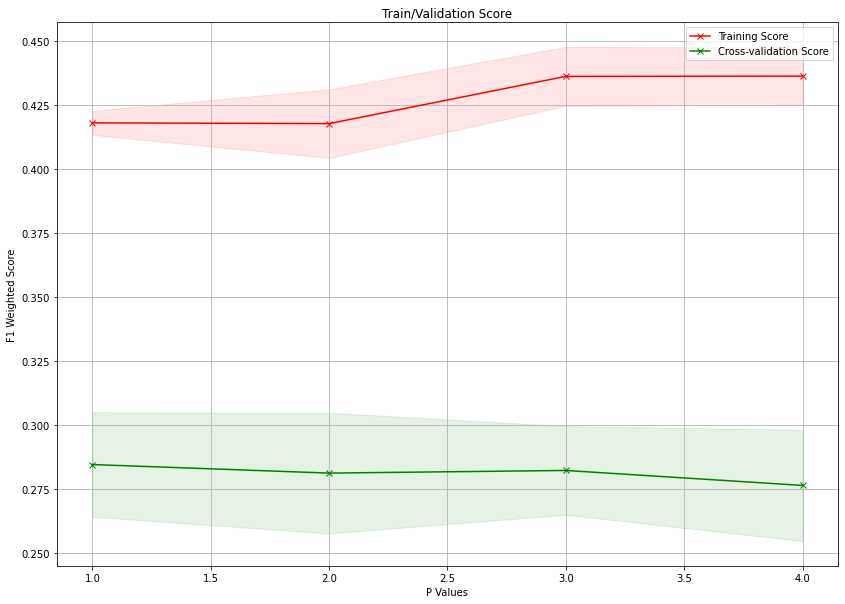

In [32]:
plot_learning_curve_hyper(df_p, 'P Values', 'F1 Weighted Score', 'Train/Validation Score')

Established a KNN with its Weight parameter set to "Distance" is achieving the Highest Accuracy

In [33]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier(weights='distance')

clf.fit(X_train_stand, y_train)

KNeighborsClassifier(weights='distance')

In [34]:
from sklearn.metrics import f1_score, classification_report

y_pred = clf.predict(X_test_stand)
print(f"F1 Macro Score on Test Set: {f1_score(y_test, y_pred, average='macro'):.2f}")
print(f'\nClassification report on test set:\n\n {classification_report(y_test, y_pred, zero_division=0)}')

F1 Macro Score on Test Set: 0.42

Classification report on test set:

               precision    recall  f1-score   support

           3       0.50      0.20      0.29         5
           4       0.39      0.17      0.24        41
           5       0.66      0.67      0.67       364
           6       0.67      0.72      0.70       550
           7       0.61      0.58      0.59       220
           8       0.49      0.39      0.43        44
           9       0.00      0.00      0.00         1

    accuracy                           0.65      1225
   macro avg       0.47      0.39      0.42      1225
weighted avg       0.64      0.65      0.64      1225



In [35]:
# Setting up bigger Grid Search to see if we can further fine tune the algorithm

final_clf = KNeighborsClassifier(weights='distance')

param_grid = [{'n_neighbors': [i for i in range(4, 9)],
               'p': [i for i in range(1, 5)]}]

final_grid = GridSearchCV(final_clf, param_grid= param_grid, cv=4, return_train_score=True, scoring='f1_macro')
final_grid.fit(X_train_stand, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(weights='distance'),
             param_grid=[{'n_neighbors': [4, 5, 6, 7, 8], 'p': [1, 2, 3, 4]}],
             return_train_score=True, scoring='f1_macro')

In [36]:
print(final_grid.best_params_)
final_model = final_grid.best_estimator_


{'n_neighbors': 8, 'p': 1}


In [37]:
y_pred_final = final_model.predict(X_test_stand)
print(f"F1 Weighted Score on Test Set: {f1_score(y_test, y_pred_final, average='macro'):.2f}")
print(f'\nClassification report on test set:\n\n {classification_report(y_test, y_pred_final, zero_division=1)}')
print(f'\nClassification report on training set:\n\n {classification_report(y_train, final_model.predict(X_train_stand), zero_division=1)}')

F1 Weighted Score on Test Set: 0.45

Classification report on test set:

               precision    recall  f1-score   support

           3       1.00      0.20      0.33         5
           4       0.64      0.17      0.27        41
           5       0.66      0.68      0.67       364
           6       0.67      0.74      0.70       550
           7       0.63      0.60      0.62       220
           8       0.75      0.41      0.53        44
           9       1.00      0.00      0.00         1

    accuracy                           0.66      1225
   macro avg       0.76      0.40      0.45      1225
weighted avg       0.66      0.66      0.65      1225


Classification report on training set:

               precision    recall  f1-score   support

           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00       122
           5       1.00      1.00      1.00      1093
           6       1.00      1.00      1.00      1648
           7    

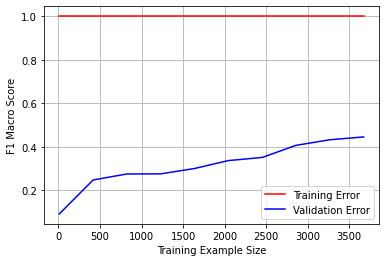

In [38]:
plot_learning_curve(final_model, X, y, X_train = X_train_stand, X_val = X_test_stand,
                    y_train= y_train, y_val = y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


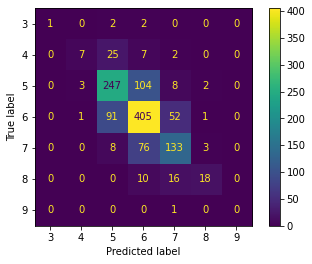

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred_final, labels = [i for i in range(3, 10)])

plot_confusion_matrix(final_model, X_test_stand, y_test)